# Customizing Colorbars

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

The simplest colorbar can be created with `plt.colorbar()`

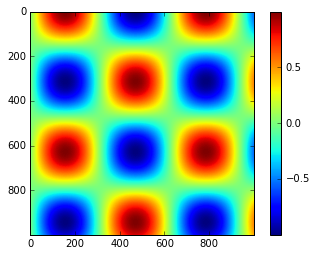

In [16]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## Customizing Colorbars

The colormap can be specified using `cmap` argument

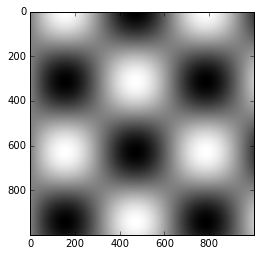

In [17]:
plt.imshow(I, cmap='gray');

All the available colormaps are in the `plt.cm` namespace

In [19]:
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'MutableMapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_DeprecatedCmapDictWrapper',
 '_LUTSIZE',
 '__builtin_cmaps',
 '__builtins__',
 '__cached__',
 '__doc__',

### Choosing the Colormap

A good reference is [here](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

We should be aware of three different categories of colormaps:
- Sequential colormaps: These are made up of one continuous sequence of colors (e.g. `binary` or `viridis`)
- Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`)
- Qualitative colormaps: these mix colors with no particular sequence (e.g. `rainbow` or `jet`)